In [16]:
import pandas as pd
import numpy as np
import scanpy as sc
from scipy import signal
import matplotlib.pyplot

def get_normed_and_zero_filtered_data(filename):
    # TODO perhaps include other normalization options
    df = pd.read_csv(filename, sep = '\t', index_col = 0)
    df = df / df.mean()
    df = df.loc[df.sum(axis=1) != 0,:]
    df = (df
          .assign(sum=df.sum(axis=1))
          .sort_values(by='sum', ascending=False)
          .drop('sum', axis = 1)
         )
    return df

def get_s745_time(names):
    return [float(el.split('_')[1]) for el in names]

def get_s814_time(names):
    return [ 6.25 * float(el.split('_')[0][-2:]) for el in names]

def get_periodgram(sc_data):
    return [signal.periodogram(sc_data.X[:,i]) for i in range(sc_data.shape[1])]

def plot_one_row_line(df, row_num):
    df.iloc[row_num,:].plot.line()
    
def plot_one_row_scatter(df, row_num, time):
    matplotlib.pyplot.scatter(df.iloc[row_num,:], time)
      

def get_periodgram1(sc_data):
    return [signal.periodogram(sc_data.X[:i]) for i in range(sc_data.shape[0])]



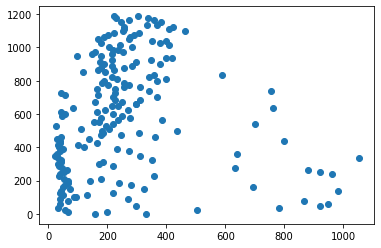

In [17]:
s745_df = get_normed_and_zero_filtered_data("data/sub_0745_miRNA.ec.tab")
s745_time = get_s745_time(s745_df.columns)
s814_df = get_normed_and_zero_filtered_data("data/sub_0814_miRNA.ec.tab")

plot_one_row_scatter(s745_df, 1,s745_time )


In [41]:
 
s814_adata = sc.read("data/sub_0814_miRNA.ec.tab").T

s814_adata.obs['time'] = get_s814_time(s814_adata.obs.index)

sc.pp.normalize_total(s814_adata, target_sum=1e6, exclude_highly_expressed=True)
sc.pp.log1p(s814_adata)
sc.pp.filter_genes(s814_adata, min_counts=1)

sc.pp.highly_variable_genes(s814_adata, n_top_genes=50)


# sc.pl.highest_expr_genes(s814_adata, n_top=30, )
s814_pd = get_periodgram(s814_adata[:,s814_adata.var.highly_variable])


50

In [24]:
import random
def k_means_from_pd_data(k,pd):
    converged = False
    # randomly select k data points as centroids
    inds = random.sample([i for i in range(50)])
    centroids = [pd[i][1] for i in inds]
    membership = {}
    for pd_i in pd:
        membership[i]=None
        min_dist = 99999999999999
        for centroid in centroids:
            dist = (pd_i[1]- centroid).norm()
            if dist < min_dist:
                dist = min_dist
                membership[i] = centroid
    # recalculate centroids:
    centroids = [np.zeros(size(centroid)) for el in centroids]
    centroid_count = {i:0 for i in range(k)}
    for i, pd_i in enumerate(pd):
        centroids[membership[i]] += pd_i[1]
        centroid_count[membership[i]] 
            




None


In [34]:
s814_pd.shape
np.log(s814_pd[1][1]+1)



AttributeError: 'list' object has no attribute 'shape'

ValueError: x and y must be the same size

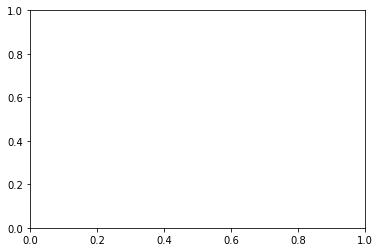

In [35]:
for i in range(10):
    matplotlib.pyplot.scatter(s814_pd[i][0], np.log(s814_pd[i][1]+1))

ValueError: x and y must be the same size

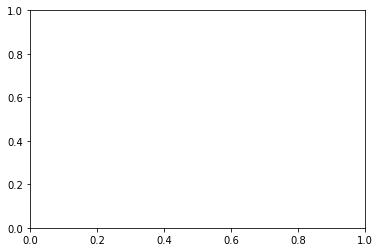

In [36]:
for i in range(10,20):
    matplotlib.pyplot.scatter(s814_pd[i][0], np.log(s814_pd[i][1]+1))

ValueError: x and y must be the same size

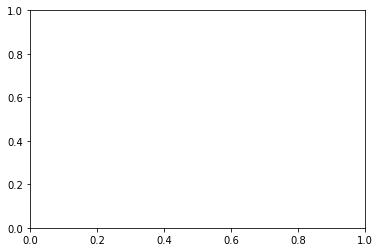

In [37]:
for i in range(20,30):
    matplotlib.pyplot.scatter(s814_pd[i][0], np.log(s814_pd[i][1]+1))

In [49]:
s814_pd = get_periodgram1(s814_adata)
s814_pd = s814_pd[:30]
s814_pd = [el[1][:15] for el in s814_pd]

print(s814_pd[0].shape)

print(s814_adata[0].shape)




(0, 1671)
(1, 1671)
